In [1]:
#Reading datasets and append the train_label dataset to train.csv as ‘Total_booking’ column.
import pandas as pd
train_X=pd.read_csv('train.csv')
train_label = pd.read_csv('train_label.csv',names=['Total_bookings'])
test_X= pd.read_csv('test.csv')
test_label = pd.read_csv('test_label.csv', names=['Total_bookings'])
train_X['Total_bookings']=train_label
test_X['Total_bookings']=test_label
train_Y=train_X['Total_bookings']
test_Y=test_X['Total_bookings']
train_X['datetime']=pd.to_datetime(train_X['datetime'])
train_X['date']=[d.date() for d in train_X['datetime']]
train_X['time']=[d.time() for d in train_X['datetime']]
test_X['datetime']=pd.to_datetime(test_X['datetime'])
test_X['date']=[d.date() for d in test_X['datetime']]
test_X['time']=[d.time() for d in test_X['datetime']]

In [2]:
#Visualize Season vs Cab Bookings
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(train_X['season'],train_X['Total_bookings'])
ax.set_title('Season Vs Cab Bookings')
ax.set_xlabel('Season')
ax.set_ylabel('Total Bookings')
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
#Finding Month from datetime
train_X['Month'] = train_X['datetime'].dt.month
train_X['Time'] = train_X['datetime'].dt.hour

test_X['Month'] = test_X['datetime'].dt.month
test_X['Time'] = test_X['datetime'].dt.hour

train_X.drop(["datetime"], axis = 1, inplace = True)
test_X.drop(["datetime"], axis = 1, inplace = True)

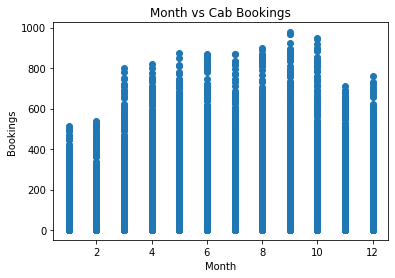

In [4]:
#Visualize Month vs Cab Bookings
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


ax.scatter(train_X['Month'], train_X['Total_bookings'])

ax.set_title('Month vs Cab Bookings')
ax.set_xlabel('Month')
ax.set_ylabel('Bookings')

plt.show()

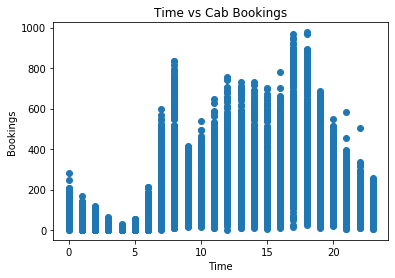

In [5]:
#Visualize Time vs Cab Bookings
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


ax.scatter(train_X['Time'], train_X['Total_bookings'])

ax.set_title('Time vs Cab Bookings')
ax.set_xlabel('Time')
ax.set_ylabel('Bookings')

plt.show()

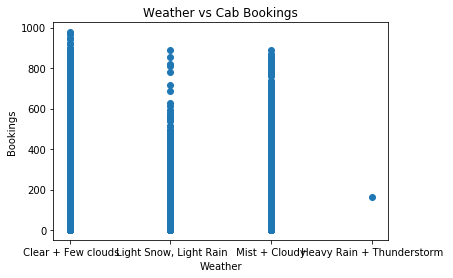

In [6]:

#Visualize Weather vs Cab Bookings
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


ax.scatter(train_X['weather'], train_X['Total_bookings'])

ax.set_title('Weather vs Cab Bookings')
ax.set_xlabel('Weather')
ax.set_ylabel('Bookings')

plt.show()



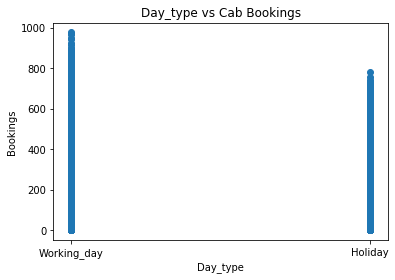

In [7]:
##Visualize Day_Type(Holiday/Working Day) vs Cab Bookings
train_X['day_type'] = 'Working_day'
train_X.loc[train_X['holiday'] == 1, 'day_type'] = 'Holiday'
train_X.loc[train_X['workingday'] == 0, 'day_type'] = 'Holiday'

import matplotlib.pyplot as plt

fig, ax = plt.subplots()


ax.scatter(train_X['day_type'], train_X['Total_bookings'])

ax.set_title('Day_type vs Cab Bookings')
ax.set_xlabel('Day_type')
ax.set_ylabel('Bookings')

plt.show()


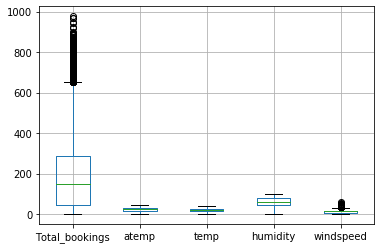

In [8]:
#Outlier Analysis
boxplot = train_X.boxplot(column=['Total_bookings','atemp','temp','humidity','windspeed'])

In [9]:
#Outlier Removal
Q1 = train_X.quantile(0.25)
Q3 = train_X.quantile(0.75)
IQR = Q3 - Q1
train_X = train_X[~((train_X < (Q1 - 1.5 * IQR)) |(train_X > (Q3 + 1.5 * IQR))).any(axis=1)]

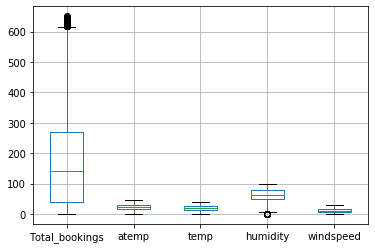

In [10]:
#Outlier Analysis after removal
boxplot = train_X.boxplot(column=['Total_bookings','atemp','temp','humidity','windspeed'])

In [11]:
#Missing Value Analysis
train_X.isnull().sum()
#No missing values found

season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
Total_bookings    0
date              0
time              0
Month             0
Time              0
day_type          0
dtype: int64

In [12]:
#Missing Value Analysis
test_X.isnull().sum()
#No missing values found

season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
Total_bookings    0
date              0
time              0
Month             0
Time              0
dtype: int64

In [13]:
#Missing Value Analysis
train_Y.isnull().sum()
#No missing values found

0

In [14]:
#Missing Value Analysis
test_Y.isnull().sum()
#No missing values found

0

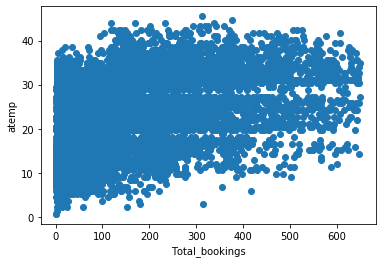

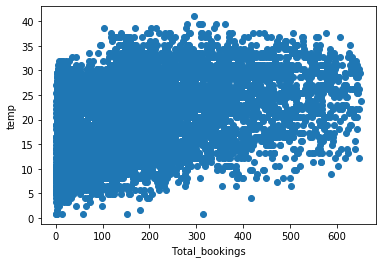

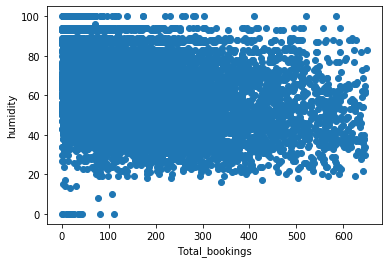

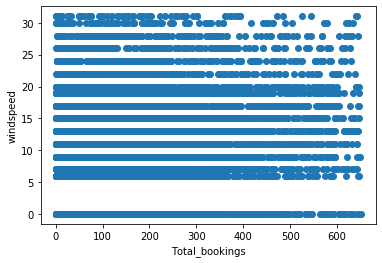

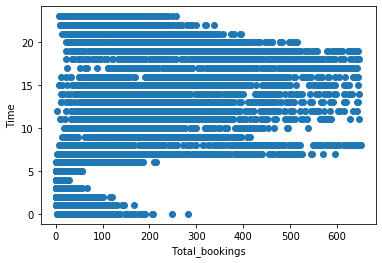

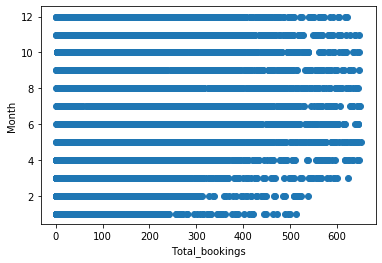

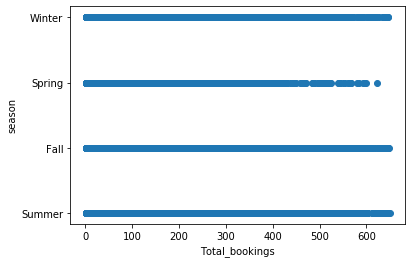

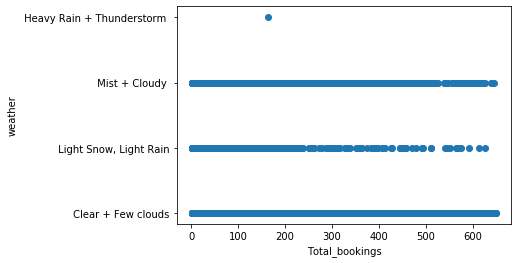

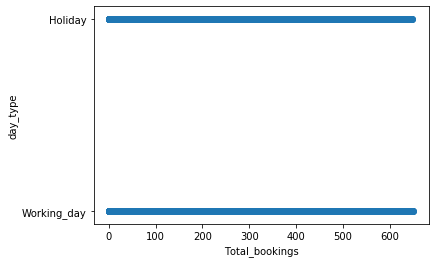

In [15]:
#Visualizing Total_booking Vs other features to generate insights
import matplotlib.pyplot as plt
cols = ['atemp','temp','humidity','windspeed','Time','Month','season','weather','day_type']
for n in cols:
    y = train_X[n]
    x = train_X['Total_bookings']
    plt.ylabel(n, fontsize=10)
    plt.xlabel("Total_bookings", fontsize=10)

    plt.scatter(x,y)
    plt.show()



In [16]:
from sklearn import preprocessing 
  
# Encoding categorical variables into numerical values
label_encoder = preprocessing.LabelEncoder() 
train_X['season']= label_encoder.fit_transform(train_X['season']) 
train_X['weather']= label_encoder.fit_transform(train_X['weather']) 
test_X['season']= label_encoder.fit_transform(test_X['season']) 
test_X['weather']= label_encoder.fit_transform(test_X['weather']) 
  



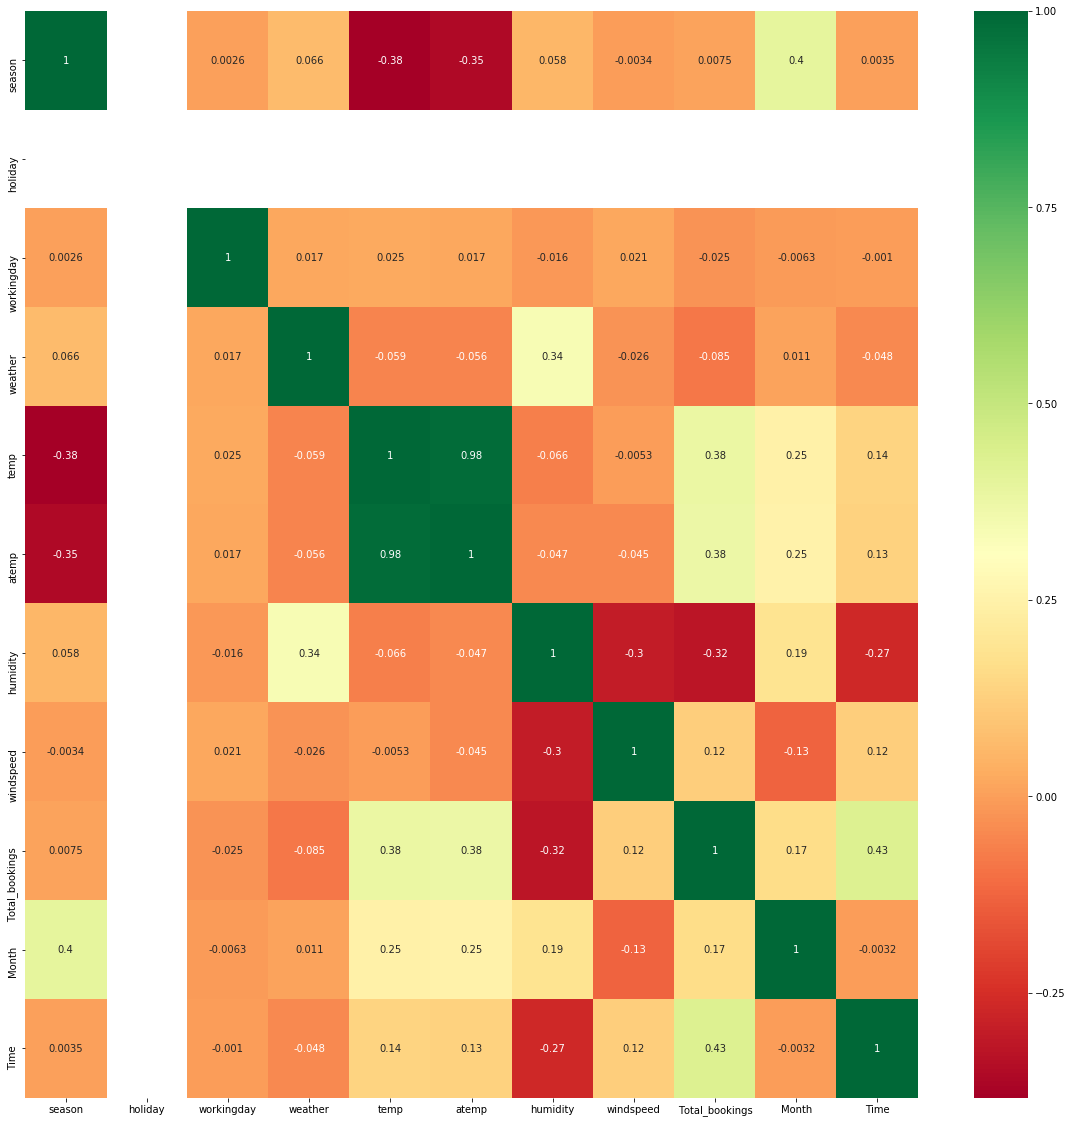

In [21]:
#Correlation Analysis using Heatmap
import seaborn as sns

X =  train_X[['holiday','workingday','temp','atemp','humidity','windspeed','Month','Time','season','weather']]  #independent columns
y = train_X['Total_bookings']   #target column i.e price range
#get correlations of each features in dataset
corrmat = train_X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_X[top_corr_features].corr(),annot=True,cmap="RdYlGn")


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.         0.0144895  0.13376777 0.13495978 0.18365917 0.18184925
 0.07413427 0.2135133  0.01917902 0.04444793]


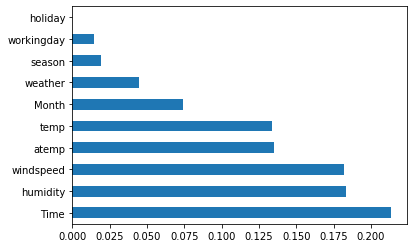

In [23]:
#Feature Selection
import pandas as pd
import numpy as np

X = train_X[['holiday','workingday','temp','atemp','humidity','windspeed','Month','Time','season','weather']]  #independent columns
y = train_X['Total_bookings']   
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [24]:
#Selecting features > 0.12 value from above 
from sklearn.model_selection import train_test_split
X=train_X[['temp', 'atemp','humidity', 'windspeed','Time']]
Y=train_X['Total_bookings']
x_test=test_X[['temp', 'atemp','humidity', 'windspeed','Time']]
y_test=test_X['Total_bookings']
#x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=42)

In [25]:
#GridSearch for tuning hyperparameters for Lasso and Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np
lasso_params = {'alpha':[0.005, 0.01, 0.02, 0.03, 0.05, 0.06]}
ridge_params = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-2,1,5,10,20]}
#Linear Regression
linreg=LinearRegression()
linreg.fit(X, Y)
#Lasso Regression
lasso=Lasso()
lassoreg_cv=GridSearchCV(lasso,lasso_params,scoring='neg_mean_squared_error')
lassoreg_cv.fit(X,Y)
print("tuned hyperparameters :(best parameters) ",lassoreg_cv.best_params_)
print("accuracy :",lassoreg_cv.best_score_)
#Ridge Regression
ridge=Ridge()
ridgereg_cv=GridSearchCV(ridge,ridge_params,scoring = 'neg_mean_squared_error')
ridgereg_cv.fit(X,Y)
print("tuned hyperparameters :(best parameters) ",ridgereg_cv.best_params_)
print("accuracy :",ridgereg_cv.best_score_)
#Best parameter for alpha(lasso): 0.005 and alpha(ridge):20

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


tuned hyperparameters :(best parameters)  {'alpha': 0.005}
accuracy : -16380.913623959204


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


tuned hyperparameters :(best parameters)  {'alpha': 20}
accuracy : -16380.906790863728


In [26]:
#MSE for linear regression, Lasso & Ridge Regression
from sklearn.metrics import mean_squared_error
y_pred = linreg.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
y_pred = lassoreg_cv.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
y_pred = ridgereg_cv.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
#All three models give almost the same mean_squared_error

147.9802236153473
147.98022861160658
147.98028191311602


In [27]:
!pip install xgboost

In [28]:
#Ensemble learning using XGBRegressor
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
model=xgb.XGBRegressor()
model.fit(X, Y)
preds=model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#XGBRegressor is raising modulenotfound error in edureka lab

C:\Users\LENOVO\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\LENOVO\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[13:14:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 107.110792


In [29]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X, Y)
y_pred = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

111.87280827903446


In [30]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X,Y)
y_pred = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

126.18935792995683


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X,Y)
model.score(x_test,y_test)
y_pred = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

107.10634682242484


In [ ]:
#The total booking was predicted using Linear Regression, Lasso & Ridge Regression. All techniques yielded almost same mse.
#Four Ensemble Learning Methods were investigated-XGBRegressor, BaggingRegressor, AdaBoostRegressor and GradientBoosting Regressor
#The lowest mse was obtained for GradientBoostingRegressor
